<a href="https://colab.research.google.com/github/juanpajedrez/pytorch_learning/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

## 1. What are 3 areas in industry where computer vision is currently being used?

Well, Computer vision with deep learning has been used to do the following tasks:

**MultiClassification**: Here, the image is passed in a multiclassification problem.

**Image Segmentation**: Here, the images is passed through a deep learning model or algorithm (contour lines, masks), to divide the image into subregions.

**Semantic Segmentation**: Here, the goal is not only to divide the image into subregions; but assign to each subregion a label (regions_1: trees, regions_2: cats, etc). Giving meaning and specificity to each region.

**Object Detection**: This is even more specific, the goal here is to identify what are the different kinds of objects in the image: (dog_1, dog_2, tree_1, etc.). The key thing here is that the output is a box region where these objects are detected.

**Instance Segmentation**: Essentially, same principle as object detection. YET is even more specific, the output in this case would be a mask or coloured region of the specific shape of these objects found! is a bit of a harder problem since it doesnt just require to identify the object general region, but to detail it properly.

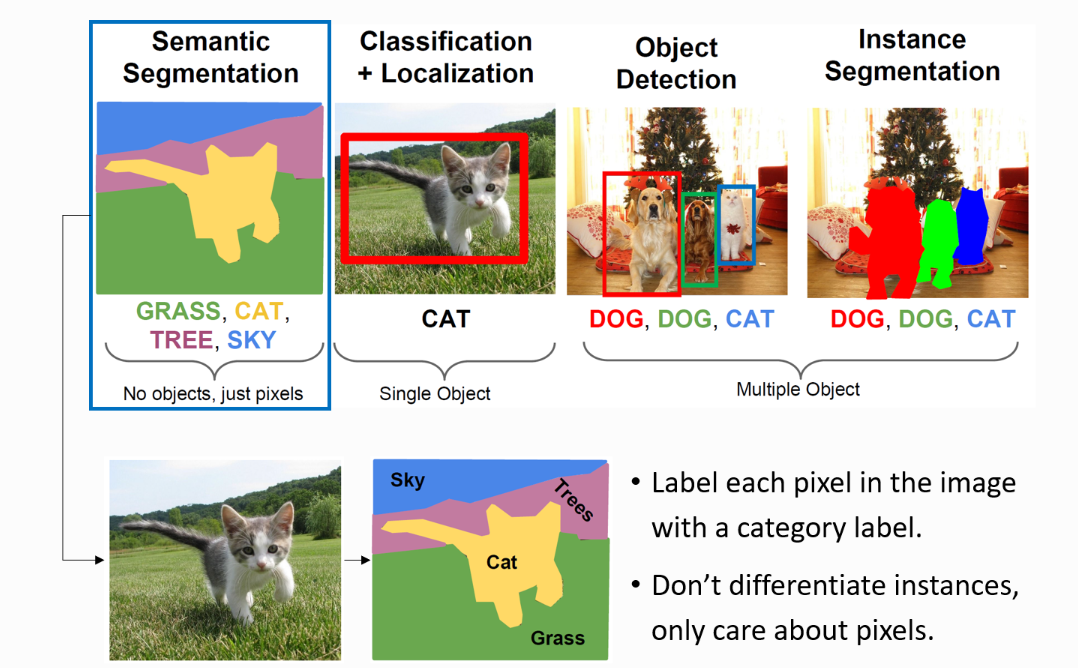

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting referes to the phenomena that a Machine Learning, or deep learning, model is able to predict and fit amazingly on the *training dataset*; yet when its deployed into the real world, its unable to generalize well: You can see this on the *validation dataset* or *test set*.

This can happen due to:
* The training data size is too small and is not representative of the real wolrd values (not diverve enough).
* The training data contains large amount of irrelevant information.
* The model trains for too long in a single sample set of data.
* The model complexity (hypothesis function) is so high, that it learns EVERYTHING, even the noise in the data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

A way to prevent this is by performing **k-fold-cross-validation**. Here, the training set is divided into k equally sized subsets called folds. Then, on each fold, a training, val, and test set are selected to score outputs.

**Pruning**: Select only the most important features and eliminate irrelevant ones. We can also use here dimension reduction of these features using PCA or ICA algorithms

**Regularization** Regularization is a collection of training/optimization techniques to reduce overfitting. This is used in the optimization problem to penalize features that might have the risk to overfit the data.

**Data augmentation**: Data augmentation when training the model in each fold can genuienly change the distribution of inputs and labels; therefore affecting the performance of the model too. This can allow for creating much generalizable models, rather than overfitted models in small subsets of data.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

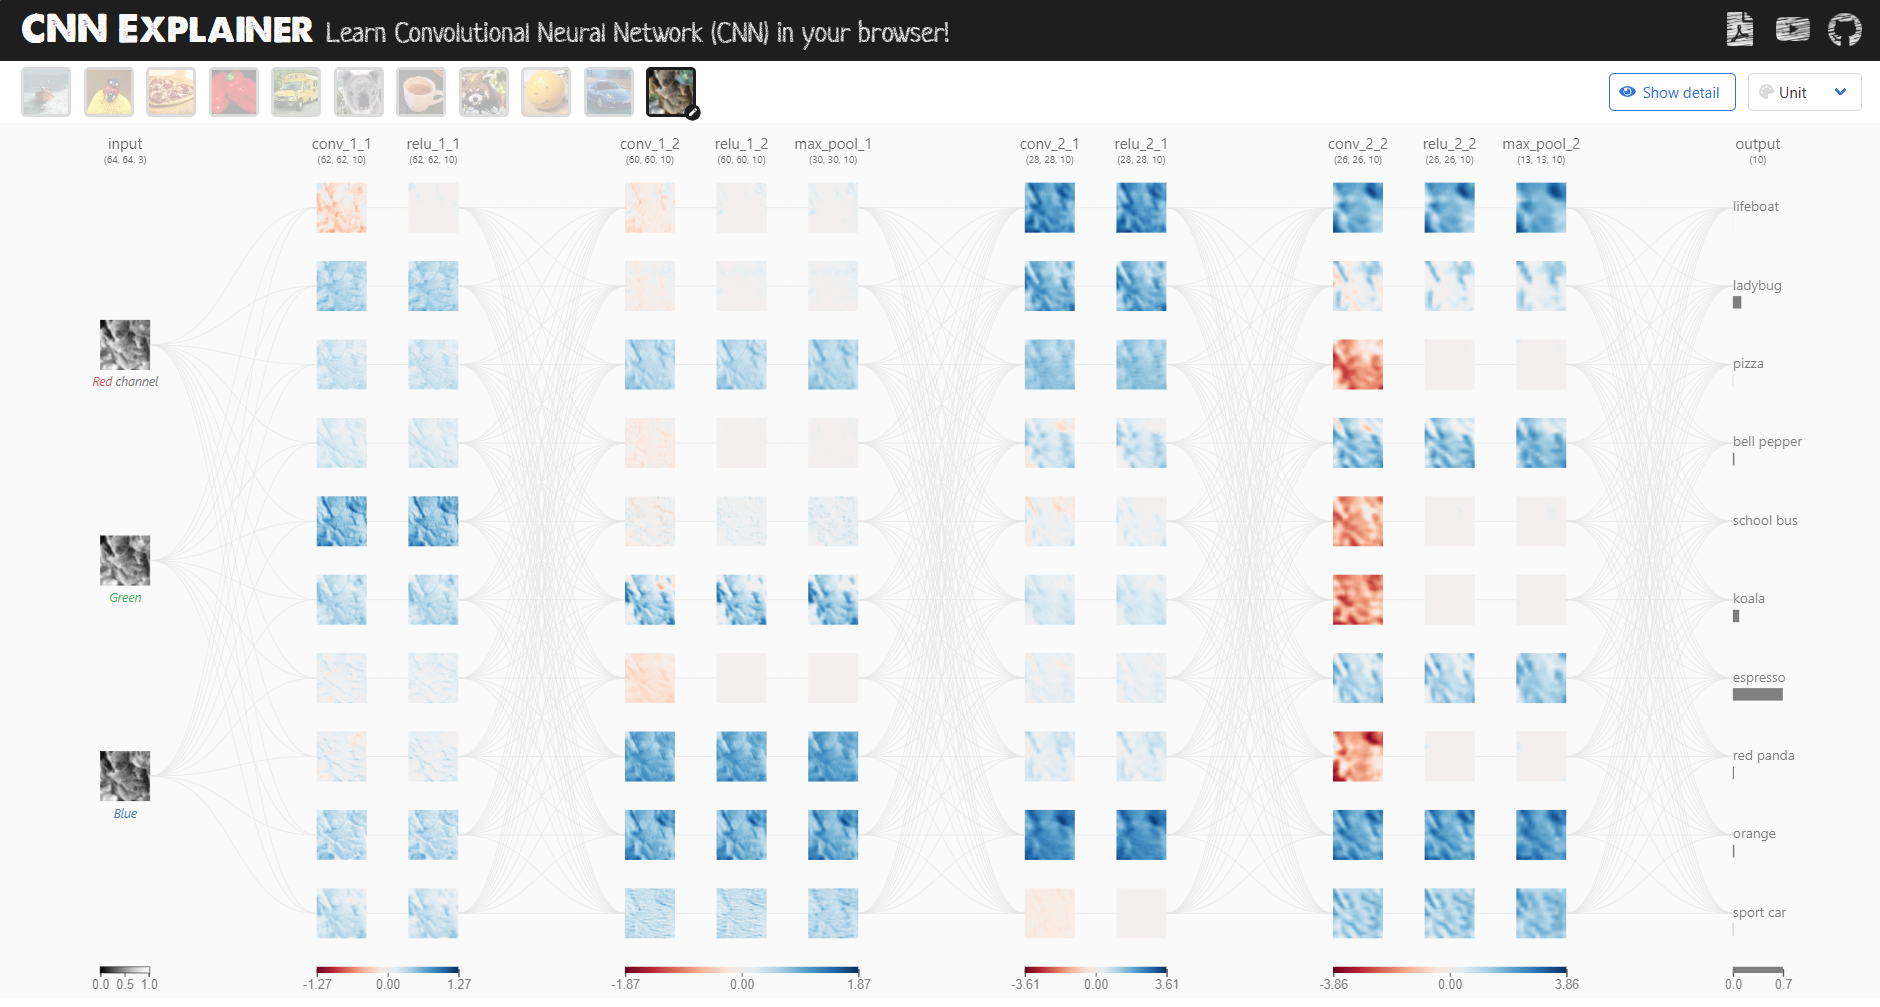

### UHMMM

I uploaded a koala and its expresso.... yeah what the hell LMAO.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torch
from torch import nn

# Import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import Path from pathlib
from pathlib import Path

In [ ]:
# Create a path to sample_data
sample_data_path = Path("sample_data")
sample_data_path.exists()

In [ ]:
# Lets obtain the train the test datyasets for MNIST
train_data = datasets.MNIST(
    root = sample_data_path, # Where are we gonna downlad the data to?
    train = True, # Are we retrieving train or test dataset?
    download=True, # Do we download the data? if it doesnt exist
    transform = ToTensor(), # What transformations done to the data?
    target_transform=None # Do we want to transform targets/labels?
)

test_data = datasets.MNIST(
    root = sample_data_path, # Where are we gonna downlad the data to?
    train = False, # Are we retrieving train or test dataset?
    download=True, # Do we download the data? if it doesnt exist
    transform = ToTensor(), # What transformations done to the data?
    target_transform=None # Do we want to transform targets/labels?
)

In [ ]:
# Lets take a look at the length of each, and shapes and classes
train_img, train_label = train_data[0]
print(f"Total amount of train data: {len(train_data)}")
print(f"train image shape: {train_img.shape} | train label: {train_label}")

test_img, test_label = test_data[0]
print(f"Total amount of test data: {len(test_data)}")
print(f"test image shape: {test_img.shape} | test label: {test_label}")

#Lets retrieve the classes/labels for both
print(f"train targets: {train_data.targets}")
print(f"train classes indices: {train_data.class_to_idx}")
print(f"test targets: {test_data.targets}")
print(f"test classes indices: {test_data.class_to_idx}")

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [ ]:
def plot_single_image(image:torch.tensor,
                      label:int):
  nrows = 1
  ncols = 1
  fig, ax = plt.subplots(nrows, ncols)
  ax.imshow(image.squeeze(), cmap="gray")
  ax.set_title(f"Label: {label}")
  ax.axis("off")

In [ ]:
# Plot different images for train and test images
plot_single_image(train_img, train_label)
plot_single_image(test_img, test_label)

In [ ]:
def plot_nine_images(dataset:torchvision.datasets):
  fig = plt.figure(figsize = (10, 10))
  n_rows = 3
  n_cols = 3
  for i in range(1, int(n_rows*n_cols) + 1):
    random_idx = torch.randint(1, len(dataset), (1, )).item()
    img, label = dataset[random_idx]
    fig.add_subplot(n_rows, n_cols, i)
    plt.imshow(img.squeeze(), cmap = "gray")
    plt.title(label)
    plt.axis("off")
  plt.show()

In [ ]:
# Lets plot for train and test! jejeje
print("======= TRAIN IMAGES =============")
plot_nine_images(train_data)
print("======= TEST IMAGES =============")
plot_nine_images(test_data)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
# Lets retrieve dataloaders with batch_size 32 for train
BATCH_SIZE = 32

# Obtain Dataloaders for each of train/test dataloaders
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size=BATCH_SIZE,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

In [ ]:
# train_dataloader has __iter__() method that allows to iterate their elements
# We need __next__() method to make it iterable to see inside one batch :)

single_train_features, single_train_labels = next(iter(train_dataloader))
print(f"Single train features shape: {single_train_features.shape}")
print(f"Single train labels shape: {single_train_labels.shape}")

In [ ]:
print(f"Total number of batches in train dataloader: {len(train_dataloader)}")
print(f"Total number of batches in test dataloader: {len(test_dataloader)}")

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
# Create a convolutional neural network
class TinyVggMNISTModel(nn.Module):
  '''
  Model Architecture that replicates the TinyVGG
  model from CNN explainer website.
  '''
  def __init__(self,input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride = 1,
                padding=1), # Values we can set ourselves in our NN's are called hyperparameters
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels = hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 1), # Values we can set ourselves in our NN's are called hyperparameters
      nn.ReLU(),
      nn.Conv2d(in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7, # There's a trick to calculating this ...
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape conv_1{x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape conv_2{x.shape}")
    x = self.classifier(x)
    # print(f"Classifier shape {x.shape}")
    return x

In [ ]:
#Lets setup the model we are gonna use
mnist_tinyvgg_model = TinyVggMNISTModel(input_shape=1,
                                         hidden_units=10,
                                         output_shape=len(train_data.classes)).to(device)

In [ ]:
# Lets test a small sample
mnist_tinyvgg_model.eval()
with torch.inference_mode():
  single_train_logits = mnist_tinyvgg_model(single_train_features.to(device))
print(single_train_logits.shape)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
# Lets setup an optimizer and loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=mnist_tinyvgg_model.parameters(),
                            lr=0.1)

### I took some of the functions
All of the main functions for:
`print_train_time()`: Function that tells you how long a program took
`accuracy_fn()`: Function that tells you how accurate y_true and y_predictions are.
`train_step()`: Function that perform train step function

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device: torch.device = None):
  '''
  Prints the difference between start and end time
  '''
  total_time = end - start
  print(f"Train time on {device} : {total_time:.3f} seconds")
  return total_time

In [ ]:
# Have a function that define accuracy_fn
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
def train_step(model: nn.Module,
               data_loader:DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  '''
  Performs training with model trying to learn on data_laoder
  '''
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data in target.device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass: y_logit
    y_logit = model(X)

    # Obtain the probabilities for multiclass problem using softmax
    y_prob = torch.softmax(y_logit, dim = 1)

    #Finaly, obtain the y_pred using torch.argmax(dim = 1)
    y_pred = y_prob.argmax(dim = 1)

    # 2. Calculate the loss and accuracy per batch
    loss = loss_fn(y_logit, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Adjust for our training loss and acc to get average per batch, per epoch.
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"%Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
            data_loader: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module,
            accuracy_fn,
            device: torch.device = device):
  '''
  Performs a testing loop step on model going over data_loader
  '''
  test_loss, test_acc = 0, 0

  #Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_logit = model(X)

      # 2 Obtain the probabilities from test_logit
      test_prob = torch.softmax(test_logit, dim = 1)

      # 3. Obtain the predictions from test_prob
      test_pred = test_prob.argmax(dim = 1)

      # 4. Calculate the loss/acc
      test_loss += loss_fn(test_logit, y)
      test_acc += accuracy_fn(y_true = y, y_pred = test_pred) #

    # Scale the test_loss and test_acc to find the average test_loss-test_acc per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [ ]:
# Get model 1 results dictionary
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
  '''
  Returns a dictionary containing the results of model predicting on data_loader
  '''
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      #Accumulate the loss and accc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))

    # Scale the loss and acc to find the average loss-acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # Only works when model was created with model class name
          "model_loss": loss.item(),
          "model_acc": acc}

In [ ]:
torch.manual_seed(42)

#Set epochs
epochs = 5

# Lets get the beginning to timeout the training
train_time_mnist_start = timer()

# Create optimization and evaluation loop using train_step() and test_step()
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n-----------")

  #Perform a batch training step
  train_step(model = mnist_tinyvgg_model,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  #Perform a batch test step
  test_step(model = mnist_tinyvgg_model,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn=accuracy_fn,
            device = device)

#Calculate the training time
train_time_mnist_end = timer()
total_train_time_model_2 = print_train_time(start=train_time_mnist_start,
                                            end=train_time_mnist_end,
                                            device=device)

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
# Obtain the model results from mnist
mnist_results = eval_model(model=mnist_tinyvgg_model,
                           data_loader = test_dataloader,
                           loss_fn = loss_fn,
                           accuracy_fn = accuracy_fn,
                           device = device)
print(mnist_results)

In [ ]:
def plot_nine_images_pred_vs_truth(model:torch.nn.Module,
                            dataset:torchvision.datasets):
  fig = plt.figure(figsize = (10, 10))
  n_rows = 3
  n_cols = 3
  for i in range(1, int(n_rows*n_cols) + 1):
    random_idx = torch.randint(1, len(dataset), (1, )).item()
    img, label = dataset[random_idx]

    #Obtain the prediction from the model
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass (outputs raw logits)
      test_logit = model(img.unsqueeze(dim = 0).to(device))

      # 2 Obtain the probabilities from test_logit
      test_prob = torch.softmax(test_logit, dim = 1)

      # 3. Obtain the predictions from test_prob
      test_pred = test_prob.argmax(dim = 1)

    # Compare test_pred against label and see if its equal
    equal = torch.eq(test_pred, label)
    fig.add_subplot(n_rows, n_cols, i)
    plt.imshow(img.squeeze(), cmap = "gray")

    # If equal, let's set green or red
    if equal:
      comparison = f"True: {label} | Pred: {test_pred.item()}"
      plt.title(comparison, color = "green")
    else:
      comparison = f"True: {label} | Pred: {test_pred.item()}"
      plt.title(comparison, color = "red")
    plt.axis("off")
  plt.show()

In [ ]:
plot_nine_images_pred_vs_truth(model = mnist_tinyvgg_model,
                               dataset = test_data)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"torchmetrics version: {torchmetrics.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= "mltxtend version should be 0.19.0 or higher")
  print(f"mlxtend version: {mlxtend.__version__}")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"torchmetrics version: {torchmetrics.__version__}")
  print(f"mlxtend version: {mlxtend.__version__}")

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

# Make predictions with trained model
y_preds = []
mnist_tinyvgg_model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making predictions..."):
    # Sending data to device
    X, y = X.to(device), y.to(device)

    # Do the forward pass
    y_logit = mnist_tinyvgg_model(X)

    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)

    # Append to y_preds
    y_preds.append(y_pred.cpu())

# Concatanate them
#print(y_preds)
y_preds_tensor = torch.cat(y_preds)

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task = "multiclass", num_classes = len(train_data.classes))
confmat_tensor = confmat(preds = y_preds_tensor, target = test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                class_names = train_data.classes,
                                figsize = (10, 7),
                                show_normed = True,
                                colorbar = True,
                                cmap = plt.cm.Blues)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
# Create a random tensor
torch.manual_seed(42)

# Kernel sizes
kernels = [3, 4, 5, 6]
random_tensor = torch.rand(size = (1, 3, 64, 64))
for k in kernels:
  test_conv_layer = nn.Conv2d(in_channels = 3,
                            out_channels = 10,
                            kernel_size = k,
                            stride = 1,
                            padding = 1)
  print(f"Input shape: {random_tensor.shape}")
  print(f"Output shape for kernel size {k}: {test_conv_layer(random_tensor).shape}")

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
plot_nine_images_pred_vs_truth(model = mnist_tinyvgg_model,
                               dataset = test_data)